<a href="https://colab.research.google.com/github/jcallaghan2020/Human-Genome-Analysis/blob/main/3rd_file2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports:

In [ ]:
import numpy as np
from numpy import where
import pandas as pd
import statistics as stat
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from __future__ import division
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline


# import scikit-allel
!pip install scikit-allel
import allel
# check which version is installed
print(allel.__version__)


import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


test_sample = allel.read_vcf('/content/drive/MyDrive/CEU6.gt.snps.poly.nomissing.vcf.gz')
gt_test = allel.GenotypeArray(test_sample['calldata/GT'])
het_count = gt_test.count_het()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 3.9 MB/s 
1.3.5
Mounted at /content/drive


In [ ]:
len(gt_test)

273657

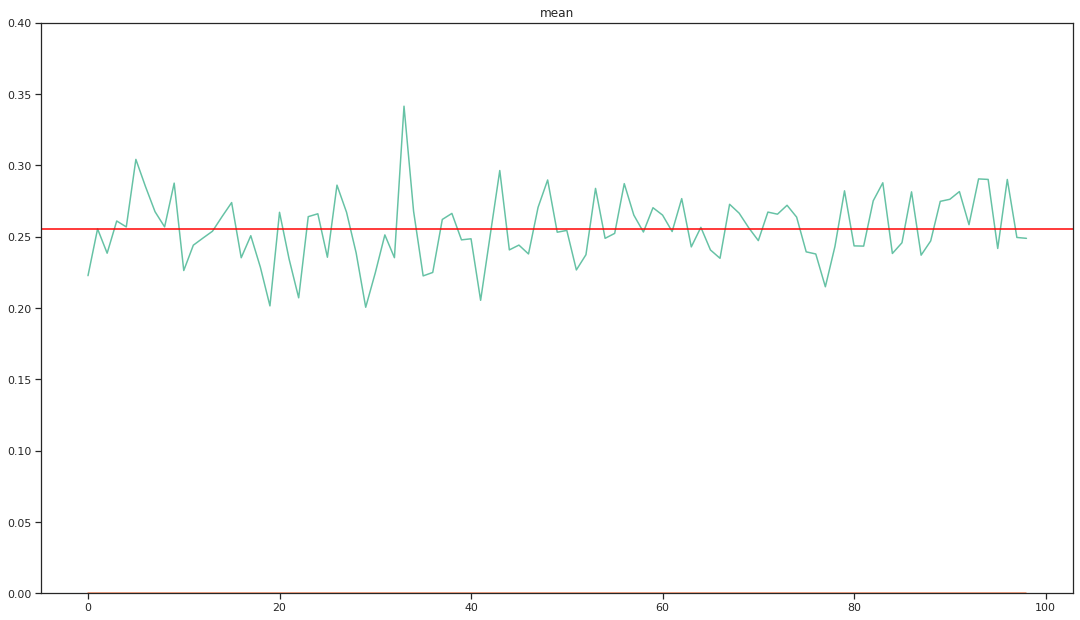

In [ ]:
#trying to do mean
def mean_visual(file_arr):
  global mean_lst
  mean_lst = []
  f_het_rate_lst = []
  count = 0
  hom_rate = 0
  het_rate = 0
  hom_rate2 = 0
  het_rate2 = 0

  #calc mean rate for individual sections
  #het = different allele values (1/0 or 0/1), hom = same allele values (0/0 or 1/1)
  for i in file_arr[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        count = count + 1
        hom_rate = hom_rate + 1
      if n == [1, 0] or n == [0, 1]:
        count = count + 1
        het_rate = het_rate + 1
      if count == int(len(file_arr)):    #divide into sections of x samples (size might need to change)
        f_het_rate = het_rate / (het_rate + hom_rate) #calculate ratio of heterozygous alleles
        f_het_rate_lst.append(f_het_rate) #add ratio to list
        hom_rate = 0
        het_rate = 0
        f_het_rate = 0
        count = 0
        mean = stat.mean(f_het_rate_lst)
        mean_lst.append(mean)
        f_het_rate_lst = []
        mean = 0
      #calc mean rate for all data
  n_het_rate = stat.mean(mean_lst)

  x = range(len(mean_lst))
  line = 0
  line = [line for i in x]
  plt.plot(x, mean_lst)
  plt.plot(x, line)
  plt.axhline(y=n_het_rate, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('mean')
  plt.ylim(0, 0.4)
  plt.show()

mean_visual(gt_test)

In [ ]:
#trying to do variance
def var_visual(file_arr):
  global var_lst
  var_lst = []
  f_het_rate_lst = []
  het_rate = 0
  hom_rate = 0
  count = 0
  d_lst = []
  n_het_rate = 0
  het_rate2 = 0
  hom_rate2 = 0
  n = 0
  i = 0
  i_lst = []
  h_r_lst = []
  f_h_r_lst = []
  is_hom1 = np.array([1, 1])
  is_hom2 = np.array([0, 0])
  is_het1 = np.array([0, 1])
  is_het2 = np.array([1, 0])


  #calc var rate for individual sections
  for i in gt_test[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        h_r_lst.append(0)
        count = count + 1
      if n == [1, 0] or n == [0, 1]:
        h_r_lst.append(1)
        count = count + 1
      if count == int(len(file_arr)):    #divide into sections of 1000 samples (size might need to change)
        hom_rate = 0
        het_rate = 0
        f_het_rate = 0
        count = 0
        s_var = stat.variance(h_r_lst)
        var_lst.append(s_var)
        h_r_lst = []



  #calc var rate for all data
  f_h_r_lst = []

  for n in gt_test[0:]:
    if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
      f_h_r_lst.append(0)
    if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
      f_h_r_lst.append(1)
  f_var = np.var(f_h_r_lst)

  x2 = range(len(var_lst)) #this value needs to be changed based on the size of the file/size of the sections (may be an easier way to calculate it)
  line = 0
  line = [line for i in x2]
  plt.plot(x2, var_lst)
  plt.plot(x2, line)
  plt.axhline(y=f_var, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('variance')
  plt.show()

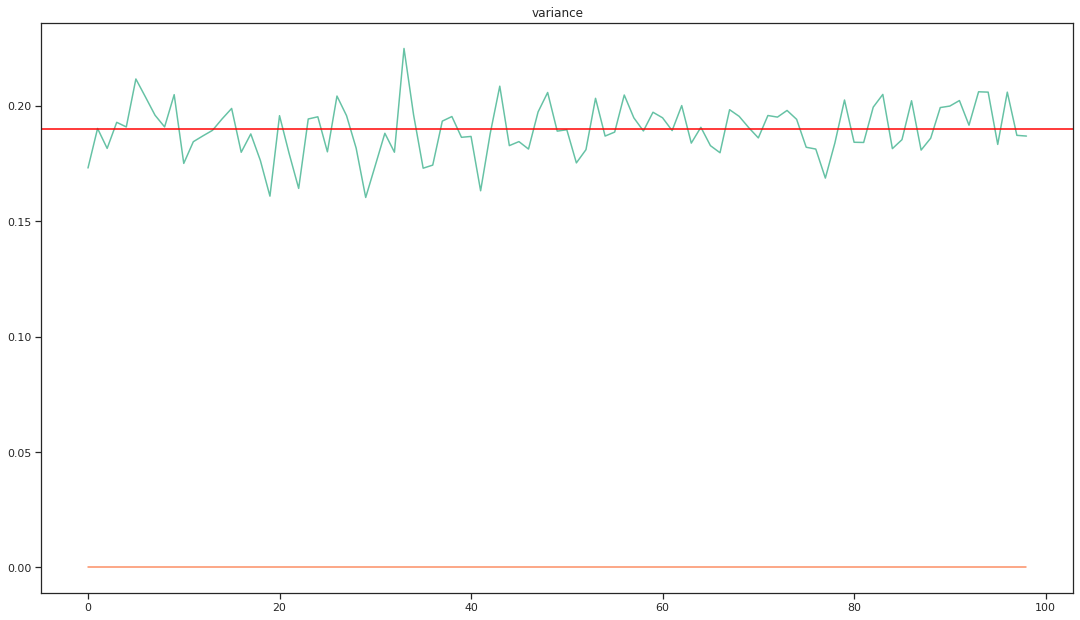

In [ ]:
var_visual(gt_test)

In [ ]:
print(var_lst[20:36])

[0.1957144073722706, 0.1793772972800808, 0.16419870576271609, 0.19428151259662116, 0.19522972787534965, 0.18004770800616043, 0.20421897444064047, 0.19570929877525808, 0.1816734544689126, 0.1602757562543125, 0.1741346184909104, 0.18808717588887144, 0.1798813727059579, 0.224837008389057, 0.1960629254502665, 0.17296257329468667]


In [ ]:
#trying to do kurtosis
def kurt_visual(file_arr):
  global kurt_lst
  kurt_lst = []
  f_het_rate_lst = []
  het_rate = 0
  hom_rate = 0
  count = 0
  i_lst = []
  d_lst = []
  n_het_rate = 0
  het_rate2 = 0
  hom_rate2 = 0
  h_r_lst = []
  n = 0
  i = 0
  j = 0
  f_h_r_lst = []
  is_hom1 = np.array([1, 1])
  is_hom2 = np.array([0,0])
  is_het1 = np.array([0, 1])
  is_het2 = np.array([1,0])


  #calc kurt rate for individual sections
  for i in gt_test[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        h_r_lst.append(0)
        count = count + 1
      if n == [1, 0] or n == [0, 1]:
        h_r_lst.append(1)
        count = count + 1
      if count == int(len(file_arr)):    #divide into sections of 1000 samples (size might need to change)
        s_kurt = kurtosis(h_r_lst)
        kurt_lst.append(s_kurt)
        count = 0
        s_kurt = 0
        h_r_lst = []


  #calc kurt rate for all data
  f_h_r_lst = []

  for n in gt_test[0:]:
    if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
      f_h_r_lst.append(0)
    if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
      f_h_r_lst.append(1)
  f_kurt = kurtosis(f_h_r_lst)


  x3 = range(len(kurt_lst)) #this value needs to be changed based on the size of the file/size of the sections (may be an easier way to calculate it)
  line2 = 0
  line2 = [line2 for i in x3]
  plt.plot(x3, kurt_lst)
  plt.plot(x3, line2)
  plt.axhline(y=f_kurt, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('kurtosis')
  plt.show()

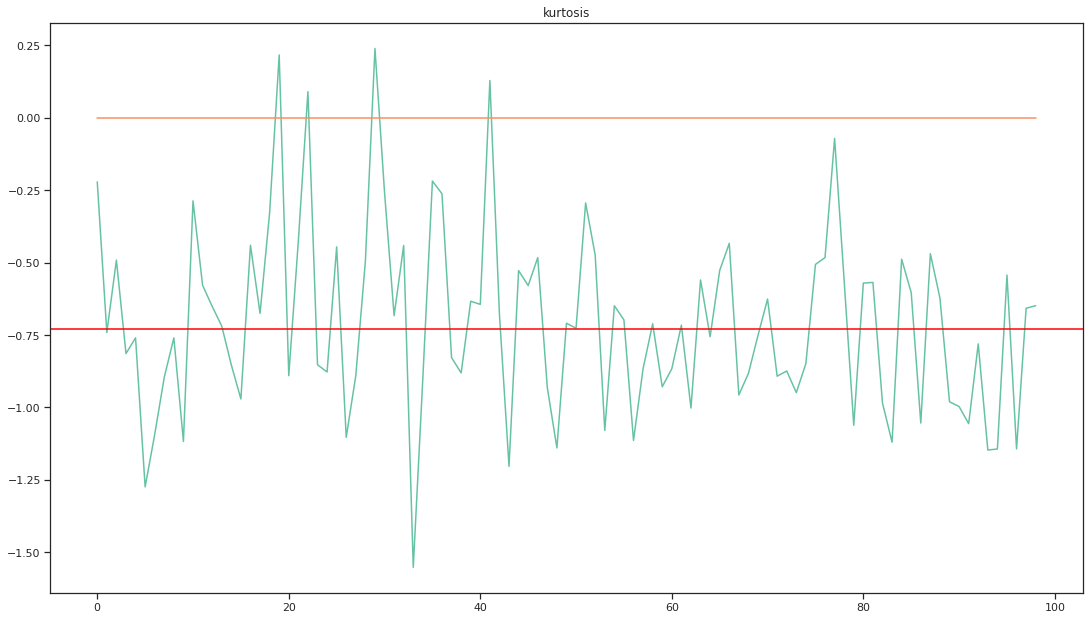

In [ ]:
kurt_visual(gt_test)

In [ ]:
print(kurt_lst)

[-0.2210915625672083, -0.7414715089676274, -0.49142566264004417, -0.8142057046129438, -0.7597947593020082, -1.2744890698657307, -1.0936008541507127, -0.8955981327928528, -0.7600876260531177, -1.117660701910658, -0.28686128853956916, -0.578266135450856, -0.6511921601483843, -0.7190565237694764, -0.8533137189486037, -0.9709486223754373, -0.44004250830021174, -0.6752565642170882, -0.32786312299253995, 0.2169723728934101, -0.8904954538134651, -0.4251381340560165, 0.09020424112190017, -0.8528110531078315, -0.8778105409166828, -0.44589622774534643, -1.103277464976757, -0.8903620804897487, -0.49559839578028564, 0.23926960379519446, -0.257295517174728, -0.6832969898295578, -0.4407603790222896, -1.5523173814320743, -0.8995780210548681, -0.21838126495115384, -0.26246632777469525, -0.8281397965447632, -0.880948191011826, -0.633450593859807, -0.6443520515334766, 0.12859225278409525, -0.6790243870290791, -1.203757104429341, -0.5276969343991973, -0.5793109059542871, -0.48281524457930525, -0.93215868

In [ ]:
#trying to do skewness
def skew_visual(file_arr):
  global skew_lst
  f_het_rate_lst = []
  het_rate = 0
  hom_rate = 0
  count = 0
  d_lst = []
  skew_lst = []
  sample_lst = []
  h_r_lst = []
  n_het_rate = 0
  het_rate2 = 0
  hom_rate2 = 0
  n = 0
  i_lst = []
  i = 0
  is_hom1 = np.array([1, 1])
  is_hom2 = np.array([0,0])
  is_het1 = np.array([0, 1])
  is_het2 = np.array([1,0])



  #calc skew rate for individual sections
  for i in gt_test[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        h_r_lst.append(0)
        count = count + 1
      if n == [1, 0] or n == [0, 1]:
        h_r_lst.append(1)
        count = count + 1
      if count == int(len(file_arr)):    #divide into sections of 1000 samples (size might need to change)
        s_skew = skew(h_r_lst)
        skew_lst.append(s_skew)
        count = 0
        s_skew = 0
        h_r_lst = []

  #calc skew for all data
  f_h_r_lst = []

  for n in gt_test[0:]:
    if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
      f_h_r_lst.append(0)
    if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
      f_h_r_lst.append(1)
  f_skew = skew(f_h_r_lst)

  x2 = range(len(skew_lst))
  line = 0 
  line = [line for i in x2]
  plt.plot(x2, skew_lst)
  plt.plot(x2, line)
  plt.axhline(y=f_skew, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('skewness')
  plt.show()

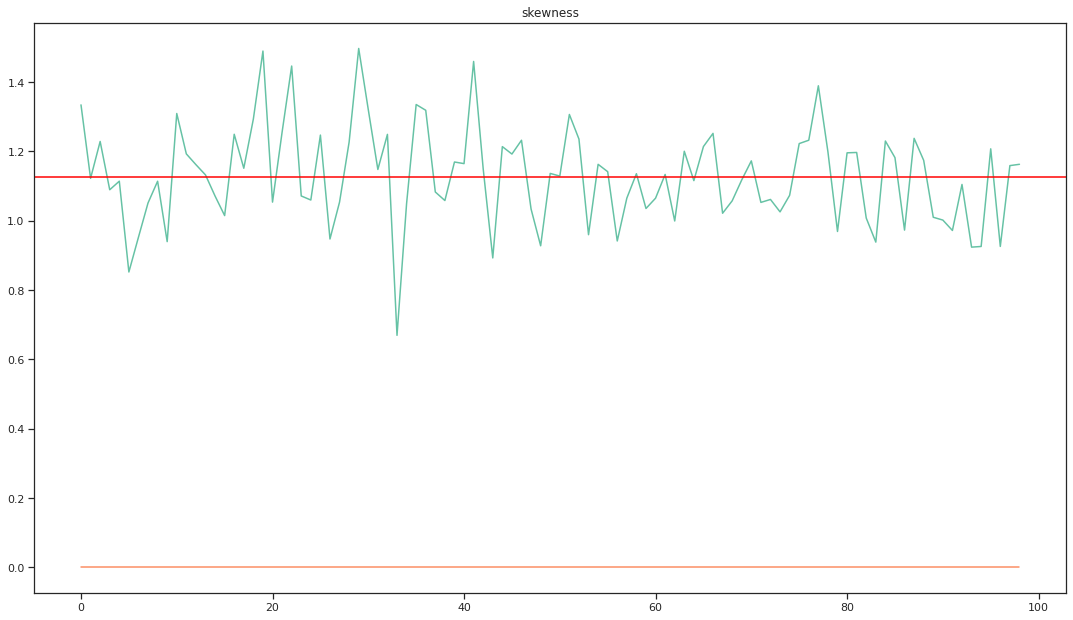

In [ ]:
skew_visual(gt_test)

In [ ]:
print(skew_lst)

[1.33375726331023, 1.1218415623573466, 1.2282403418549466, 1.0889418236926416, 1.1136450245468672, 0.8517692939606764, 0.9520499702480363, 1.0509052608142884, 1.1135135266115461, 0.9393291745119716, 1.3088692491843608, 1.1923648202413317, 1.1613818665071431, 1.1317877346174607, 1.0708343854450117, 1.014421696152326, 1.2489825826246685, 1.150974993552385, 1.2931113165568775, 1.4889500908000273, 1.0533302170670578, 1.254935004669159, 1.445753866023501, 1.07106906728379, 1.059334441563813, 1.246636984953781, 0.9469543468527102, 1.0533935254738613, 1.2265405024782978, 1.496418926569426, 1.3201153293653074, 1.147476801582691, 1.2486951673557922, 0.6690908896165944, 1.049009999449544, 1.3347729151615444, 1.3181554051876072, 1.0825249204776939, 1.0578524514260836, 1.1689950411101804, 1.1643229571156464, 1.4589695859695277, 1.1493370319322878, 0.8923244340320731, 1.2133849618323131, 1.1919266311504721, 1.2317405390019012, 1.0333640756346523, 0.9273861227563519, 1.1360508529635147, 1.1283989093

SVM Model

In [ ]:
mean_arr = np.array(mean_lst)
mean_arr = mean_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(mean_arr)
pred = clf.predict(mean_arr) 
model = OneClassSVM(kernel = 'rbf',nu = 0.10).fit(mean_arr)

In [ ]:
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(mean_arr)

In [ ]:
# filter outlier index
outlier_index_mean = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_mean

(array([ 5, 13, 17, 18, 19, 21, 29, 31, 33, 41, 42, 43, 47, 49, 50, 51, 55,
        58, 59, 61, 73]),)

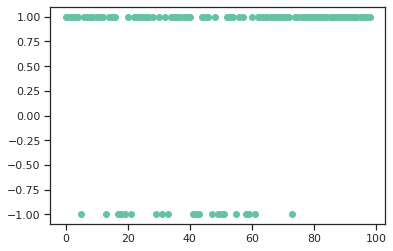

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

In [ ]:
var_arr = np.array(var_lst)
var_arr = var_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(var_arr)
pred = clf.predict(var_arr) 
nu = stat.mean(var_lst)
model = OneClassSVM(kernel = 'rbf',nu = 0.10).fit(var_arr)
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(var_arr)

In [ ]:
# filter outlier index
outlier_index_var = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_var

(array([ 5,  7, 12, 19, 20, 27, 29, 33, 34, 39, 40, 43, 54, 59, 70, 71, 88,
        93, 97, 98]),)

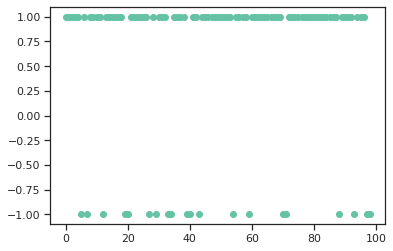

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

In [ ]:
kurt_arr = np.array(kurt_lst)
kurt_arr = kurt_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(kurt_arr)
pred = clf.predict(kurt_arr) 
nu = stat.mean(kurt_lst)
model = OneClassSVM(kernel = 'rbf',nu = 0.10).fit(kurt_arr)
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(kurt_arr)

In [ ]:
# filter outlier index
outlier_index_kurt = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_kurt

(array([ 5, 11, 14, 19, 20, 23, 24, 27, 29, 33, 35, 37, 38, 41, 45, 57, 60,
        63, 68, 71, 72, 74, 78, 80, 81, 85, 95]),)

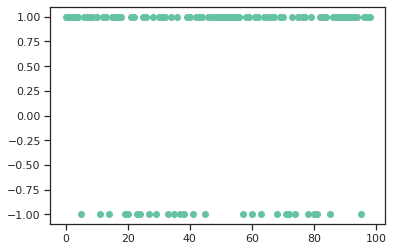

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

In [ ]:
skew_arr = np.array(skew_lst)
skew_arr = skew_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(skew_arr)
pred = clf.predict(skew_arr) 
model = OneClassSVM(kernel = 'rbf',nu = 0.10).fit(skew_arr)
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(skew_arr)

In [ ]:
# filter outlier index
outlier_index_skew = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_skew

(array([ 5,  7, 19, 20, 27, 29, 33, 34, 39, 40, 43, 47, 59, 70, 71, 85, 88,
        93]),)

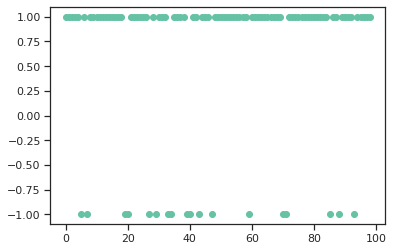

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

Using all stats to find obvious anomalies


In [ ]:
#find regions which each statistic show an anomaly
skew_kurt_intersect = np.intersect1d(outlier_index_kurt, outlier_index_skew)
mean_var_intersect = np.intersect1d(outlier_index_var, outlier_index_mean)
intersect_anom = np.intersect1d(mean_var_intersect, skew_kurt_intersect)
print('outliers found in samples:',intersect_anom)

outliers found in samples: [ 5 19 29 33]


Isolation Forest Model

In [ ]:
mean_arr = np.array(mean_lst)
mean_arr = mean_arr.reshape(-1, 1)
n = int(len(mean_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(mean_arr)
len(mean_arr)

99

In [ ]:
anomaly_score = model.decision_function(mean_arr)
anomaly_decision = model.predict(mean_arr)

In [ ]:
# filter outlier index
outlier_index_mean = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_mean

(array([ 5, 29, 33, 43]),)

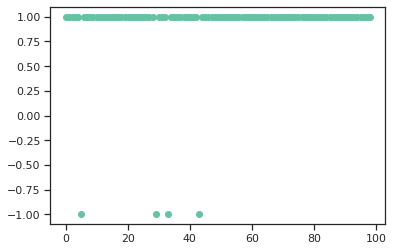

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

USING VAR:


In [ ]:
var_arr = np.array(var_lst)
var_arr = var_arr.reshape(-1, 1)
n = int(len(var_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(var_arr)
len(var_arr)

99

In [ ]:
anomaly_score = model.decision_function(var_arr)
anomaly_decision = model.predict(var_arr)

In [ ]:
outlier_index_var = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_var

(array([ 5, 19, 29, 33, 43]),)

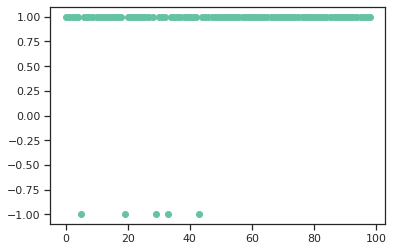

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

USING KURTOSIS


In [ ]:
kurt_arr = np.array(kurt_lst)
kurt_arr = kurt_arr.reshape(-1, 1)
n = int(len(kurt_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(kurt_arr)
len(kurt_arr)

99

In [ ]:
anomaly_score = model.decision_function(kurt_arr)
anomaly_decision = model.predict(kurt_arr)

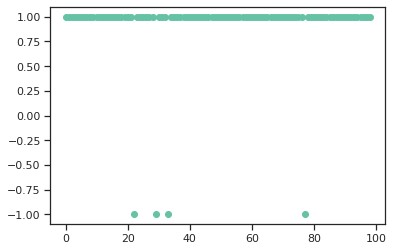

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

USING SKEWNESS

In [ ]:
skew_arr = np.array(skew_lst)
skew_arr = skew_arr.reshape(-1, 1)
n = int(len(skew_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(skew_arr)
len(skew_arr)

99

In [ ]:
anomaly_score = model.decision_function(skew_arr)
anomaly_decision = model.predict(skew_arr)

In [ ]:
# filter outlier index
outlier_index_skew = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_skew

(array([ 5, 19, 29, 33, 77]),)

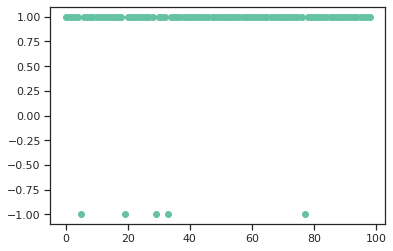

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

Using each statistic to identify most clear anomalies

In [ ]:
#find regions which each statistic show an anomaly
skew_kurt_intersect = np.intersect1d(outlier_index_kurt, outlier_index_skew)
mean_var_intersect = np.intersect1d(outlier_index_var, outlier_index_mean)
intersect_anom = np.intersect1d(mean_var_intersect, skew_kurt_intersect)
print('Outliers found in samples:', intersect_anom)

Outliers found in samples: [29 33]


In [ ]:
intersect_lst = intersect_anom.tolist()

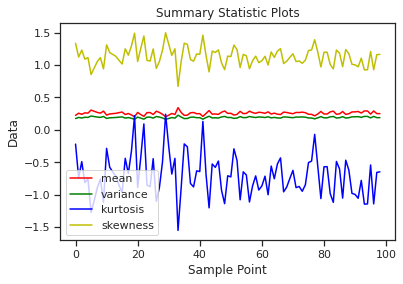

In [ ]:
X1 = mean_lst
X2 = var_lst
X3 = kurt_lst
X4 = skew_lst

plt.plot(X1, color = 'r', label = 'mean')
plt.plot(X2, color = 'g', label = 'variance')
plt.plot(X3, color = 'b', label = 'kurtosis')
plt.plot(X4, color = 'y', label = 'skewness')

plt.xlabel("Sample Point")
plt.ylabel("Data")
plt.title("Summary Statistic Plots")

plt.legend()

plt.show()